<h2>  Part One: Data Input </h2>	


<h3>  Import Statements </h3>	


In [2]:
#Import anything you need here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
from skimage import color
import os


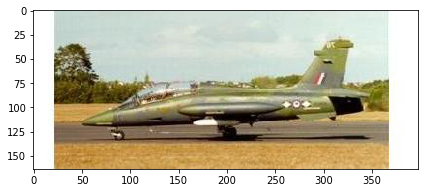

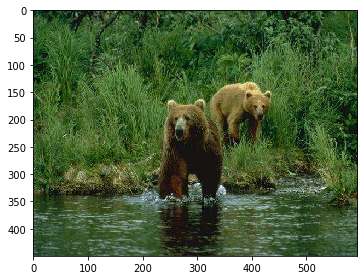

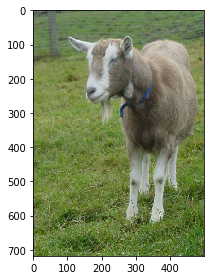

In [2]:
#Example of reading in a file


def show_three_pics():
    filename = os.path.join(os.getcwd(), '20_categories_training', 'airplanes', 'airplanes_0001.jpg')
    airplane = io.imread(filename)
    filename = os.path.join(os.getcwd(), '20_categories_training', 'bear', 'bear_0001.jpg')
    bear = io.imread(filename)
    filename = os.path.join(os.getcwd(), '20_categories_training', 'goat', 'goat_0001.jpg')
    goat = io.imread(filename)
    io.imshow(airplane)
    plt.show()
    io.imshow(bear)
    plt.show()
    io.imshow(goat)
    plt.show()
    
show_three_pics()

<h4> Using the code for reference, take the given folder and create a dataframe with the picture object, and the encoding as listed below. </h4>	
0=Airplanes, 1=Bear, 2=Blimp, 3=Comet, 4=Crab, 5=Dog, 6=Dolphin, 7=Giraffe, 8=Goat, 9=Gorilla, 10=Kangaroo, 11=Killer-Whale, 12=Leopards, 13=Llama, 14= Penguin, 15= Porcupine, 16=Teddy-Bear, 17=Triceratops, 18=Unicorn, 19=Zebra

In [1]:
def files_to_df_given_subfolder(subfolder_path, encoding):
    # Given the path of a subfolder which directly contains the picture files, we convert all the pictures in to
    # a dataframe and label them according to the encoding
    pic_names=os.listdir(subfolder_path)
    remove_list = []
    for s in pic_names:
        if s.startswith('.'):
            remove_list.append(s)    
    pic_names = [s for s in pic_names if s not in remove_list]
    pic_names.sort()
  
    pic_data = []
    num_of_files = len(pic_names)
    for pic_name in pic_names:
        pic_path = os.path.join(subfolder_path, pic_name)
        pic_data.append(io.imread(pic_path))            
    
    pic_df = pd.DataFrame({'Encoding':[encoding]*num_of_files, 'Pictures': pic_data})
    return pic_df    

def read_organize_data(file_path):

    # get subfolders name
    label_folders_list=os.listdir(os.path.join(os.getcwd(), file_path))    
    
    # remove files start with '.'
    remove_list = []
    for s in label_folders_list:
        if s.startswith('.'):
            remove_list.append(s)    
    label_folders_list = [s for s in label_folders_list if s not in remove_list]
    label_folders_list.sort()   

    # read in pic files in a given subfolder and concatenate them
    df_list = []
    encoding = 0
    for s in label_folders_list:
        subfolder_path = os.path.join(os.getcwd(), file_path, s)            
        pic_df = files_to_df_given_subfolder(subfolder_path, encoding)
        df_list.append(pic_df)        
        encoding += 1
    return pd.concat(df_list) 

In [4]:
test_df = files_to_df_given_subfolder('20_Validation', -1)

C:\Users\yifan\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19660800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\yifan\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


In [5]:
test_df

,Encoding,Pictures
0,-1,"[[[80, 79, 74], [56, 55, 50], [54, 53, 48], [4..."
1,-1,"[[[213, 173, 85], [213, 173, 85], [213, 173, 8..."
2,-1,"[[[19, 36, 30], [14, 31, 25], [11, 26, 21], [1..."
3,-1,"[[[95, 138, 69], [95, 138, 69], [95, 138, 69],..."
4,-1,"[[[162, 204, 242], [164, 203, 242], [164, 203,..."
...,...,...
711,-1,"[[[129, 161, 94], [117, 145, 84], [115, 138, 8..."
712,-1,"[[[152, 82, 132], [152, 87, 121], [153, 96, 10..."
713,-1,"[[[13, 7, 33], [11, 7, 34], [7, 6, 37], [7, 7,..."
714,-1,"[[[196, 188, 165], [169, 161, 138], [163, 157,..."


In [34]:
train_df=read_organize_data('20_categories_training')
train_df.reset_index(inplace=True)
# since test set is not labeled, we just assign a dummy encoding to it
test_df = files_to_df_given_subfolder('20_Validation', -1)

# saving as binary data 
train_df.to_pickle(os.path.join(os.getcwd(), 'training_data.pkl'))
test_df.to_pickle(os.path.join(os.getcwd(), 'test_data.pkl'))